In [ ]:
from google.colab import files
uploaded = files.upload()

Saving INF2178_A4_data.csv to INF2178_A4_data.csv


# 2178 Assignment4
# Student name:Jianheng Chen
# Student number:1005680746
# Instructor:Shion Guha
# Course:INF2178

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova
# Load the dataset
data = pd.read_csv('INF2178_A4_data.csv')

# Display the first few rows, we need to check if there is any
# missing value like we did before
print(data.head())
data.describe(include='all')

# Check dataset info, cleaning
print(data.info())
missing = data.isnull().sum()

print(missing)
# There are some missing value in this dataset which are 15 in SES and 1 in MMSE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=f08e02b4040a7443e6fc397be81e1e09a6b5638f02fbc4103f4cb511af0bf656
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.8 MB/s eta 0:00:00
   Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
2           2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
3           3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
4           5  OAS2_0004  OAS2_0004

In [ ]:
# For here, we know SES is Socioeconomic Status and
# MMSE is Mini Mental State Examination, and we need to choose the
# columns of our interest
# Since in this assignment we are considering within subject and between subject
# effects, I will choose the following subjects
df = pd.DataFrame(data = data, columns=['Subject ID','Group', 'Visit', 'eTIV', 'nWBV'])
df

,Subject ID,Group,Visit,eTIV,nWBV
0,OAS2_0001,Nondemented,1,1987,0.696
1,OAS2_0001,Nondemented,2,2004,0.681
2,OAS2_0002,Demented,1,1678,0.736
3,OAS2_0002,Demented,2,1738,0.713
4,OAS2_0004,Nondemented,1,1215,0.710
...,...,...,...,...,...
289,OAS2_0184,Demented,2,1351,0.708
290,OAS2_0185,Demented,1,1704,0.711
291,OAS2_0185,Demented,2,1693,0.694
292,OAS2_0186,Nondemented,1,1319,0.801


# EDA

In [ ]:
# We shall see the descriptive data first
print(df.describe())

            Visit         eTIV        nWBV
count  294.000000   294.000000  294.000000
mean     1.489796  1478.853741    0.731381
std      0.500748   176.559755    0.037373
min      1.000000  1106.000000    0.646000
25%      1.000000  1347.250000    0.703000
50%      1.000000  1461.500000    0.732000
75%      2.000000  1569.000000    0.756000
max      2.000000  2004.000000    0.837000


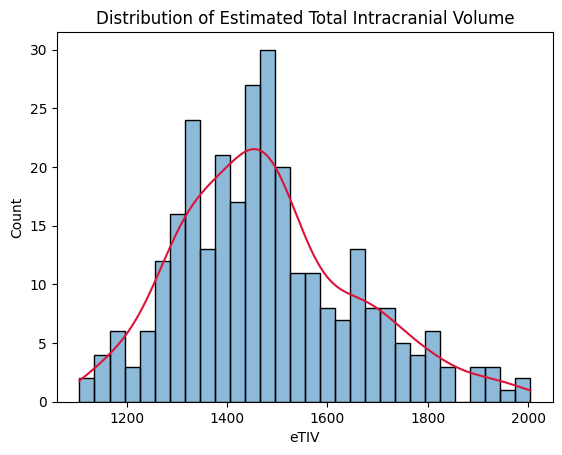

In [ ]:
# See the distribution of service user count
pt1 = sns.histplot(data = df, x='eTIV', bins = 30, kde = True)
pt1.lines[0].set_color('crimson')

plt.xlabel('eTIV')
plt.ylabel('Count')
plt.title('Distribution of Estimated Total Intracranial Volume')
plt.show()

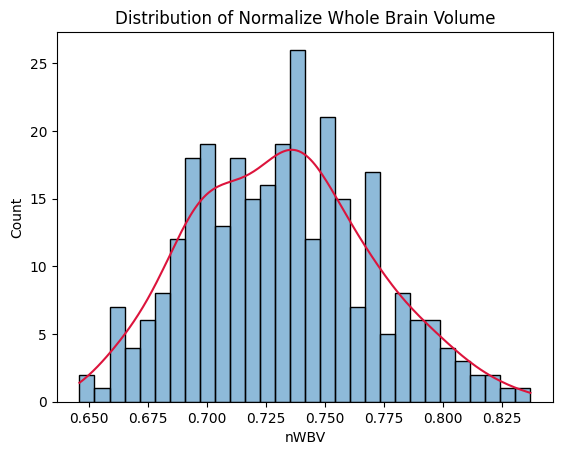

In [ ]:
pt1 = sns.histplot(data = df, x="nWBV", bins = 30, kde = True)
pt1.lines[0].set_color('crimson')

plt.xlabel('nWBV')
plt.ylabel('Count')
plt.title('Distribution of Normalize Whole Brain Volume')
plt.show()

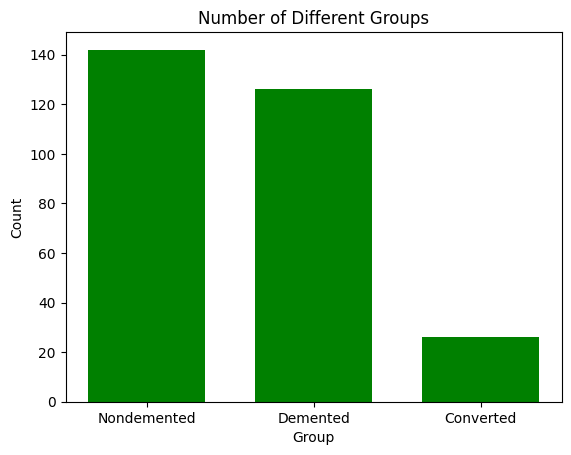

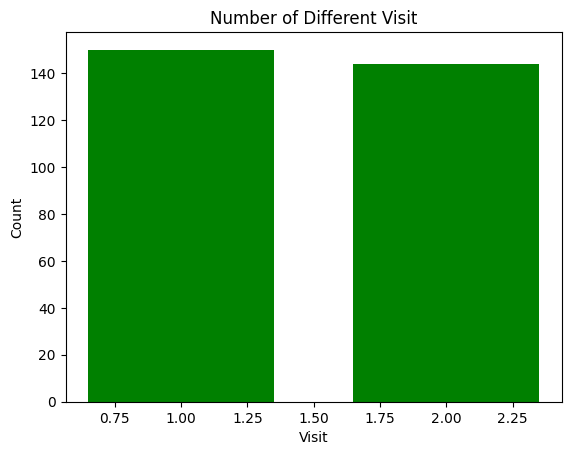

In [ ]:
# For the 2 categorical variables, check the count of different categories
plt.bar(df['Group'].value_counts().index, df['Group'].value_counts().values,
        color='green', width= 0.7)
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Number of Different Groups')
plt.show()

plt.bar(df['Visit'].value_counts().index, df['Visit'].value_counts().values,
        color='green', width= 0.7)
plt.xlabel('Visit')
plt.ylabel('Count')
plt.title('Number of Different Visit')
plt.show()

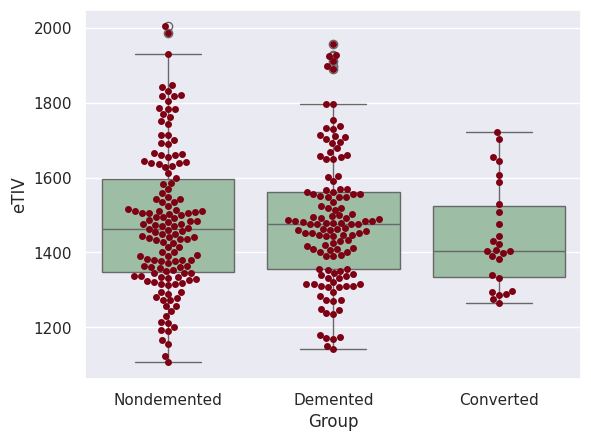

In [ ]:
# See effect between groups
# For eTIV
ax = sns.boxplot(x='Group', y='eTIV', data=df, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="eTIV", data=df, color='#7d0013')
plt.show()

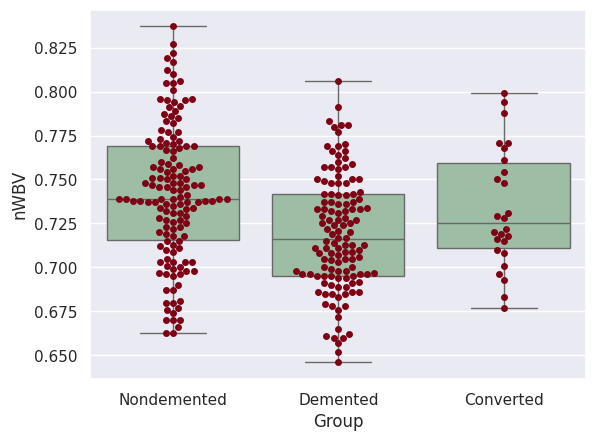

In [ ]:
# For nWBV
ax = sns.boxplot(x='Group', y='nWBV', data=df, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="nWBV", data=df, color='#7d0013')
plt.show()

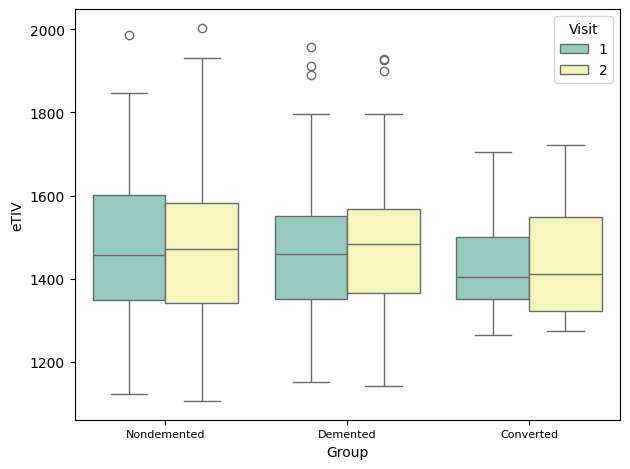

In [ ]:
# Lets see the boxplots considering within subject effect
sns.boxplot(x='Group', y='eTIV', hue='Visit',data=df, palette='Set3')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

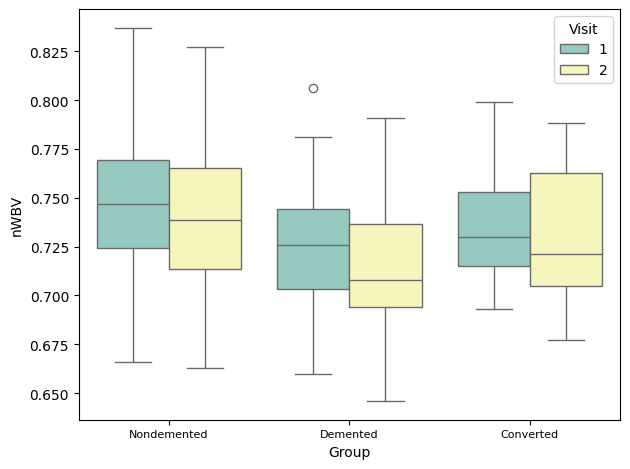

In [ ]:
sns.boxplot(x='Group', y='nWBV', hue='Visit',data=df, palette='Set3')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

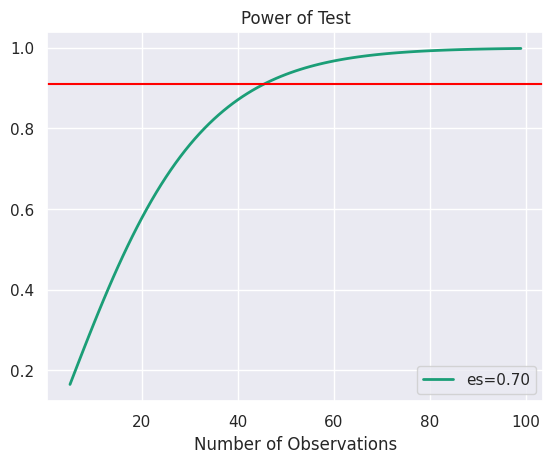

In [ ]:
from statsmodels.stats.power import TTestIndPower
# power analysis varying parameters
effect_sizes = np.array([0.7])
alpha = 0.05
power = 0.91
sample_sizes = np.array(range(5, 100))

# plot power curves
obj = TTestIndPower()

obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes, alpha=alpha)
plt.axhline(y=power, color='red')
plt.show()

# Mixed-effect ANOVA

<ipython-input-10-945837ef4740>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Group', y='eTIV', hue='Visit', dodge=True, markers=['o', 's'],


<Axes: xlabel='Group', ylabel='eTIV'>

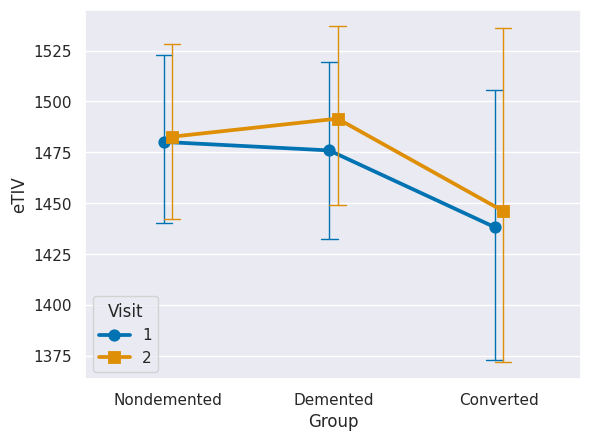

In [ ]:
# Rsearch question 1:
# eTIV considering mixed effect
sns.set()
sns.pointplot(data=df, x='Group', y='eTIV', hue='Visit', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [ ]:
df.groupby(['Visit', 'Group'])['eTIV'].agg(['mean', 'std']).round(2)

mean     std
Visit Group                       
1     Converted    1438.29  132.95
      Demented     1475.94  173.62
      Nondemented  1480.11  183.75
2     Converted    1446.25  150.29
      Demented     1491.55  177.26
      Nondemented  1482.69  186.32

In [ ]:
import pingouin as pg
aov1 = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov1)


ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -------
Group        37424.708      2    141  18712.354  0.297    0.743  0.004  nan
Visit         5573.920      1    141   5573.920  9.225    0.003  0.061    1.000
Interaction   1004.783      2    141    502.392  0.831    0.438  0.012  nan



<ipython-input-15-994c5c6627bd>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Group', y='nWBV', hue='Visit', dodge=True, markers=['o', 's'],


<Axes: xlabel='Group', ylabel='nWBV'>

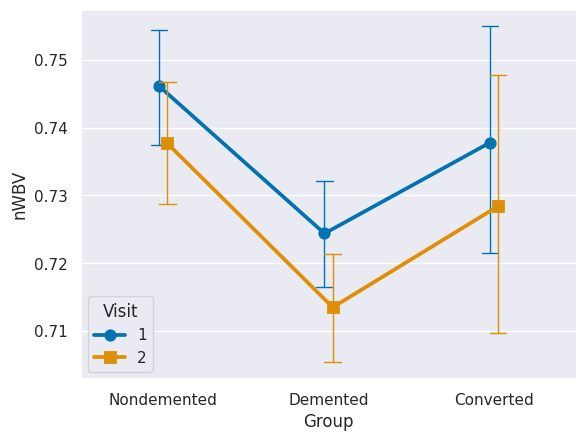

In [ ]:
# Rsearch question 2:
# nWBV considering mixed effect
sns.set()
sns.pointplot(data=df, x='Group', y='nWBV', hue='Visit', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [ ]:
df.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

In [ ]:
aov2 = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov2)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



# Assumption checking

In [ ]:
# For eTIV
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df, dv='eTIV', subject='Subject ID', within='Visit')[-1]

1.0

In [ ]:
#test of normality
pg.normality(data=df, dv='eTIV', group='Visit')

,W,pval,normal
Visit,,,
1,0.969209,0.001908,False
2,0.977016,0.015926,False


In [ ]:
#test homogeneity
pg.homoscedasticity(data=df,dv='eTIV',group='Visit')

,W,pval,equal_var
levene,0.158769,0.690583,True


In [ ]:
# For nWBV
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df, dv='nWBV', subject='Subject ID', within='Visit')[-1]

1.0

In [ ]:
#test of normality
pg.normality(data=df, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.990075,0.372060,True
2,0.989654,0.366703,True


In [ ]:
#test homogeneity
pg.homoscedasticity(data=df,dv='nWBV',group='Visit')

,W,pval,equal_var
levene,0.504444,0.478121,True
